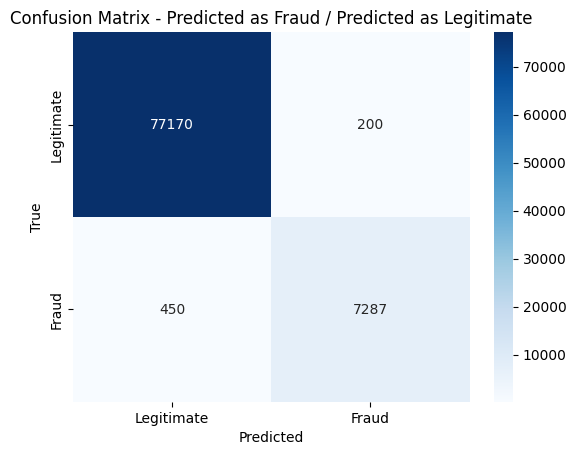

Accuracy: 0.9923625553714736


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

# Load the ensemble model
ensemble_model = joblib.load('ensemble_model.pkl')

# Load the undersampled features dataset (x_undersampled.csv)
x_undersampled = pd.read_csv('x_undersampled.csv')

# Load the undersampled target dataset (y_undersampled.csv)
y_undersampled = pd.read_csv('y_undersampled.csv')

# Assuming the target variable is named 'target' in y_undersampled, replace it if different
y_true = y_undersampled['is_fraud']

# Make predictions using the ensemble model on x_undersampled
y_pred = ensemble_model.predict(x_undersampled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['Legitimate', 'Fraud']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Predicted as Fraud / Predicted as Legitimate')
plt.show()




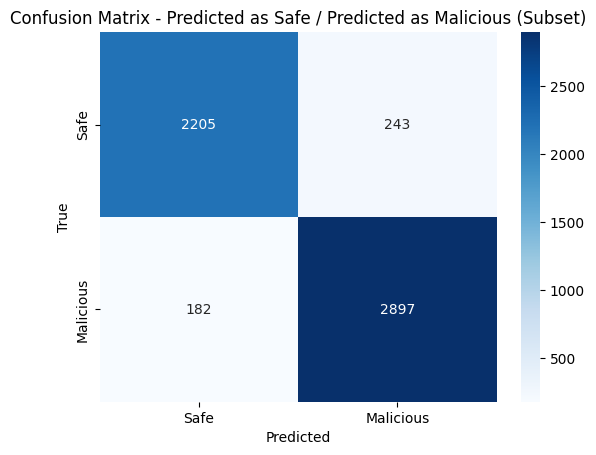

Accuracy on Subset: 0.9231047584584766
Recall on Subset: 0.9408898993179604


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score
from sklearn.model_selection import train_test_split
import joblib

# Load the URL model
url_model = joblib.load('url_model.pkl')

# Load the phishing dataset (assuming it's named 'phishing.csv')
phishing_data = pd.read_csv('phishing.csv')
phishing_data = phishing_data.drop(['Index'],axis = 1)

# Assuming the target variable is named 'is_malicious' in the dataset, replace it if different
X_phishing = phishing_data.drop('class', axis=1)
y_phishing_true = phishing_data['class']

# Create a balanced subset with 50% malicious and 50% safe samples
X_phishing_subset, _, y_phishing_subset, _ = train_test_split(X_phishing, y_phishing_true, test_size=0.5, stratify=y_phishing_true, random_state=42)

# Make predictions using the URL model on the subset
y_phishing_pred_subset = url_model.predict(X_phishing_subset)

# Generate the confusion matrix for the subset
conf_matrix_phishing_subset = confusion_matrix(y_phishing_subset, y_phishing_pred_subset)

# Plot the confusion matrix using seaborn heatmap
labels_phishing = ['Safe', 'Malicious']
sns.heatmap(conf_matrix_phishing_subset, annot=True, fmt='d', cmap='Blues', xticklabels=labels_phishing, yticklabels=labels_phishing)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Predicted as Safe / Predicted as Malicious (Subset)')
plt.show()

# Calculate and print accuracy for the subset
accuracy_phishing_subset = accuracy_score(y_phishing_subset, y_phishing_pred_subset)
print(f"Accuracy on Subset: {accuracy_phishing_subset}")
# Calculate and print recall for the subset
recall_phishing_subset = recall_score(y_phishing_subset, y_phishing_pred_subset)
print(f"Recall on Subset: {recall_phishing_subset}")
